In [232]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [233]:
df = pd.read_csv('climate2.csv')
df.dropna(inplace=True)
#we use the dropna() function to remove missing values

In [234]:
df.shape
df.describe()

,TAVG,TMAX,TMIN
count,10.00000,10.000000,10.000000
mean,39.60000,52.800000,26.100000
std,10.88526,12.191071,11.704225
min,23.00000,36.000000,10.000000
25%,30.75000,46.750000,19.750000
50%,39.50000,51.000000,23.500000
75%,47.50000,56.750000,33.750000
max,58.00000,73.000000,45.000000


In [235]:
X = df['TMIN'].values.reshape(-1,1).astype('float32')
Y = df['TMAX'].values.reshape(-1,1).astype('float32')

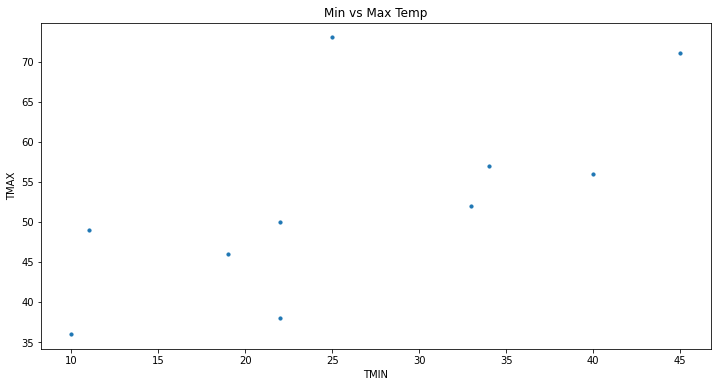

In [236]:
fig, (ax1) = plt.subplots(1, figsize = (12,6))
ax1.scatter (X, Y, s = 10)
plt.title('Min vs Max Temp')
plt.xlabel('TMIN')
plt.ylabel('TMAX')
plt.show()

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [238]:
h = LinearRegression()
h.fit(X_train,Y_train)
print(h.intercept_) # to retreive theta_0
print(h.coef_) # to retrive theta_1

[37.7367]
[[0.5390463]]


In [239]:
Y_pred = h.predict(X_test)
compare = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
compare

,Actual,Predicted
0,71.0,61.993782
1,57.0,56.064270


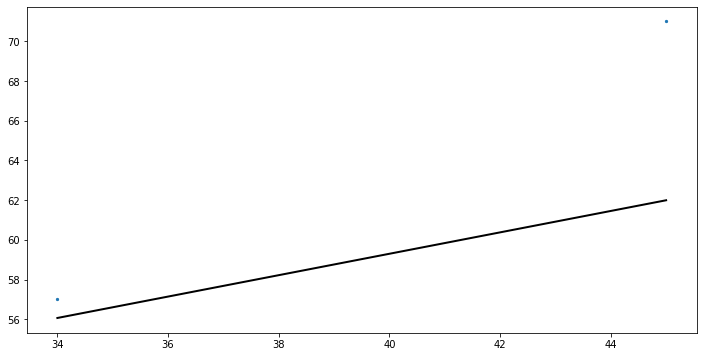

In [240]:
fig,(ax1) = plt.subplots(1, figsize = (12,6))
ax1.scatter (X_test, Y_test, s = 5)
plt.plot(X_test,Y_pred, color = 'black', linewidth = 2)
plt.show()

_0=[32.24405], theta_1=[0.79096586], cost=[77.67106]
iter=2180, theta_0=[32.279366], theta_1=[0.7897917], cost=[77.64083]
iter=2190, theta_0=[32.314278], theta_1=[0.78863114], cost=[77.61136]
iter=2200, theta_0=[32.348843], theta_1=[0.78748226], cost=[77.582535]
iter=2210, theta_0=[32.382996], theta_1=[0.78634727], cost=[77.55442]
iter=2220, theta_0=[32.416786], theta_1=[0.7852242], cost=[77.526955]
iter=2230, theta_0=[32.450203], theta_1=[0.78411347], cost=[77.50015]
iter=2240, theta_0=[32.48328], theta_1=[0.7830141], cost=[77.47395]
iter=2250, theta_0=[32.516006], theta_1=[0.78192616], cost=[77.44837]
iter=2260, theta_0=[32.548325], theta_1=[0.78085214], cost=[77.42342]
iter=2270, theta_0=[32.580322], theta_1=[0.7797882], cost=[77.39902]
iter=2280, theta_0=[32.611965], theta_1=[0.77873677], cost=[77.37523]
iter=2290, theta_0=[32.643276], theta_1=[0.77769566], cost=[77.35195]
iter=2300, theta_0=[32.674255], theta_1=[0.77666634], cost=[77.32928]
iter=2310, theta_0=[32.70489], theta_1=[

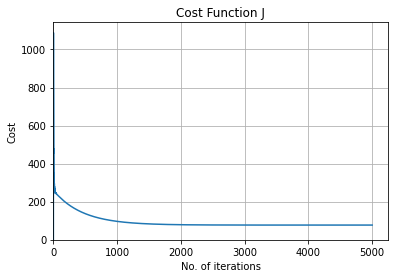

In [293]:
# Implement linear regression
# pick some random value to start with
theta_0 =   np.random.random()
theta_1 =   np.random.random()

def hypothesis (theta_0, theta_1, X):
    return theta_1*X + theta_0

def cost_function (X, Y, theta_0, theta_1):
    m = len(X)
    summation = 0.0
    for i in range (m):
        summation += ((theta_1 * X[i] + theta_0) - Y[i])**2
    return summation/(m)
    
def gradient_descent(X,Y, theta_0,theta_1,learning_rate):
    t0_deriv = 0
    t1_deriv = 0
    learning_rate = 0.001
    m = len(X)
    
    for i in range (m):

        t0_deriv += (theta_1 * X[i] + theta_0) - Y[i]
        t1_deriv += ((theta_1 * X[i] + theta_0) - Y[i]) * X[i]

        theta_0 -=   (1/m) * learning_rate * t0_deriv 
        theta_1 -= (1/m) * learning_rate * t1_deriv

    return  theta_0, theta_1

def training (X, Y, theta_0, theta_1, learning_rate, iters):
    cost_history = [0]
    t0_history = [0]
    t1_history = [0]

    for i in range(iters):
        theta_0, theta_1 = gradient_descent(X, Y, theta_0, theta_1, learning_rate)

        t0_history.append(theta_0)
        t1_history.append(theta_1)

        cost = cost_function(X, Y, theta_0, theta_1) 
        cost_history.append(cost)
        if i%10 == 0:
            print ("iter={}, theta_0={}, theta_1={}, cost={}".format(i, theta_0, theta_1, cost))
    return t0_history, t1_history, cost_history   

    # We choose learning rate equals 0.01 for 2000 iterations, and plot our cost function J
t0_history, t1_history, cost_history = training(X, Y, theta_0, theta_1, 0.001, 5000)

# Plot the cost function
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

#exp = lambda cost_function: 10**(cost_function)`                                           
#log = lambda cost_function: np.log(cost_function)

#ax.set_yscale('function', functions=(exp, log))
plt.plot(cost_history)
plt.ylim(ymin=-1)
plt.xlim(xmin=-1)
plt.grid()
plt.show()


In [264]:
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes()

# set up our plot
plt.ylabel("TMAX")
plt.xlabel("TMIN")
plt.title('Linear Regression')
plt.scatter(X, Y, color = 'gray', s=5)
line, = ax.plot([], [])
plt.close()







In [270]:
# Generate the animation data,
def init():
    line.set_data([], [], lw=2)
    annotation.set_text('')
    return line, annotation
# animation function. This is called sequwntially
def animate(i):
    #print(i)
    X = np.linspace(-5, 20, 1000)
    Y = past_thetas[i][i]*x + past_thetas[i][0]

    line.set_data(X, Y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=np.arange(1,400), interval=40, blit=True)

    from IPython.display import HTML
    HTML(anim.to_html5_video())
   